In [1]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
import pandas as pd
import numpy as np
from time import perf_counter 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import sem
import pickle

gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [2]:
path_root = '/home/jreynolds/21summer/epidural/PostProc/FigureImages/'
img_filenames=[
    'Distance_0.0mm.jpg',
    'Distance_0.5mm.jpg',
    'Distance_1.0mm.jpg',
    'Distance_1.5mm.jpg',
    'Distance_2.0mm.jpg',
    'Distance_2.5mm.jpg',
]
img_list=[]
for i in img_filenames:
    img = mpimg.imread(path_root+str(i), format = "jpg") 
    print(i, " -- ", img.shape)
    img_list.append(img)

Distance_0.0mm.jpg  --  (681, 241, 3)
Distance_0.5mm.jpg  --  (681, 241, 3)
Distance_1.0mm.jpg  --  (681, 241, 3)
Distance_1.5mm.jpg  --  (681, 241, 3)
Distance_2.0mm.jpg  --  (681, 241, 3)
Distance_2.5mm.jpg  --  (681, 241, 3)


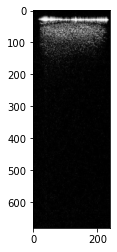

In [3]:
plt.imshow(img_list[0])

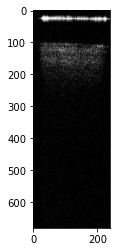

In [4]:
plt.imshow(img_list[1])

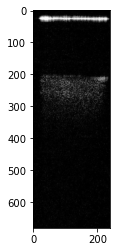

In [5]:
plt.imshow(img_list[2])

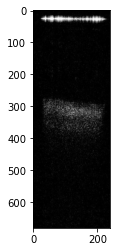

In [6]:
plt.imshow(img_list[3])

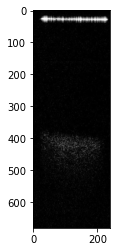

In [7]:
plt.imshow(img_list[4])

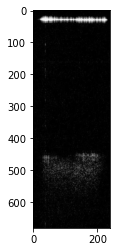

In [8]:
plt.imshow(img_list[5])

In [9]:
img_1D = [i[:,:,0] for i in img_list]
img_1D[2].shape

(681, 241)

In [10]:
img_1D.pop(0) # not using zero-distance image
images_1D_arr = np.array(img_1D)
images_1D_arr.shape

(5, 681, 241)

In [11]:
path='/home/jreynolds/21summer/epidural/ct_cv_models/A/'
#testname='S7/'
testname='2/'
modelname1='model_S1_Xception.h5'
modelname2='model_S2_Xception.h5'
path2m1=path+testname+modelname1
path2m2=path+testname+modelname2
m1=keras.models.load_model(path2m1)
preddies1=m1.predict(images_1D_arr)
m2=keras.models.load_model(path2m2)
preddies2=m2.predict(images_1D_arr)
print(preddies1)
print("\n")
print(preddies2)

[[ 472.7299]
 [1116.4982]
 [1574.9431]
 [2317.153 ]
 [2695.5586]]


[[ 470.7061]
 [1086.0793]
 [1574.9125]
 [2252.172 ]
 [2705.3118]]


In [12]:
preds=[]
bool_m1=[True, True, False, False, True]
ground_truths = [475.0, 1087.5, 1525.0, 2268.75, 2668.75]
for i in range(len(preddies1)):
    if bool_m1[i]:
        preds.append(preddies1[i][0])
    else:
        preds.append(preddies2[i][0])
    print('%0.4f | %0.4f' %(ground_truths[i], preds[i]))

475.0000 | 472.7299
1087.5000 | 1116.4982
1525.0000 | 1574.9125
2268.7500 | 2252.1721
2668.7500 | 2695.5586
